## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse ID"].value_counts())
mouse_count

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data.loc[combined_data["Mouse ID"] == "g989"]

duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data_clean = combined_data.loc[combined_data["Mouse ID"] != "g989"]
combined_data_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = len(combined_data_clean["Mouse ID"].value_counts())
mouse_count_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
treatment_group = combined_data_clean.groupby("Drug Regimen")

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_summary = treatment_group["Tumor Volume (mm3)"].mean().rename("Mean Tumor Growth").to_frame()
tumor_summary["Median Tumor Growth"] = treatment_group["Tumor Volume (mm3)"].median()
tumor_summary["Variance"] = treatment_group["Tumor Volume (mm3)"].var()
tumor_summary["Standard Deviation"] = treatment_group["Tumor Volume (mm3)"].std()
tumor_summary["Standard Error"] = treatment_group["Tumor Volume (mm3)"].sem()

tumor_summary

,Mean Tumor Growth,Median Tumor Growth,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = combined_data_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Timepoints')

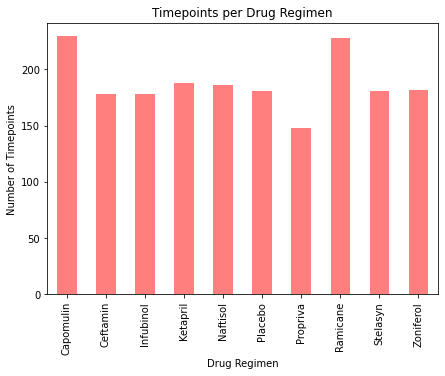

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
plt.figure(figsize = (7,5))
x_axis = np.arange(len(treatment_group["Drug Regimen"]))
tick_locations = [value for value in x_axis]

pandas_bar = plt.bar(x_axis,(treatment_group["Timepoint"].count()), color = 'r', alpha = 0.5, align = "center", width = 0.5)
plt.xticks(tick_locations, tumor_summary.index, rotation = "vertical")

#Graph limits
plt.xlim(-0.5, len(x_axis)-0.5)

#Labels
plt.title("Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0, 0.5, 'Number of Timepoints')

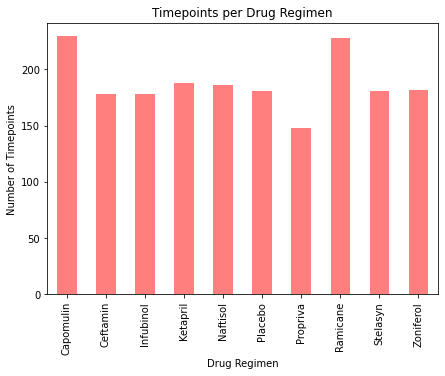

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drug_timepoint = combined_data_clean[["Drug Regimen", "Timepoint"]].groupby("Drug Regimen")["Timepoint"].count()

drup_timepoint_bar = drug_timepoint.plot(kind = "bar", color = "r", alpha = 0.5, figsize = (7,5), width = 0.5, legend = False)

plt.title("Timepoints per Drug Regimen")
plt.ylabel("Number of Timepoints")

Text(0.5, 1.0, 'Male vs Female mice')

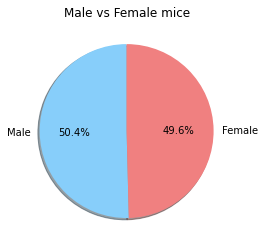

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Calculate number of male and female mice using clean data
mouse_group = combined_data_clean.groupby(["Mouse ID", "Sex"])
mouse_group_df = pd.DataFrame(mouse_group.count())
mouse_group_df = mouse_group_df.reset_index()
male_female = mouse_group_df["Sex"].value_counts().to_frame()

#Parameters for pie chart
labels = ["Male", "Female"]
numbers = [male_female.loc["Male","Sex"], male_female.loc["Female","Sex"]]
colors = ["lightskyblue", "lightcoral"]

#Make pie chart
pandas_pie = plt.pie(numbers, labels = labels, colors = colors, startangle=90, shadow = True, autopct="%1.1f%%")

plt.title("Male vs Female mice")

Text(0, 0.5, '')

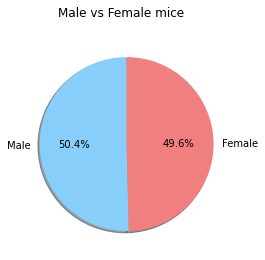

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

male_female_pie = male_female.plot(kind = "pie", title = "Male vs Female mice", startangle=90, shadow = True, 
                 colors = ["lightskyblue", "lightcoral"], subplots = True, legend = False, autopct="%1.1f%%")

plt.ylabel("")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
specific_treatment = combined_data_clean.loc[(combined_data_clean["Drug Regimen"] == "Capomulin") |
                                             (combined_data_clean["Drug Regimen"] == "Ramicane") |
                                             (combined_data_clean["Drug Regimen"] == "Infubinol") |
                                             (combined_data_clean["Drug Regimen"] == "Ceftamin")
                                            ]

# Start by getting the last (greatest) timepoint for each mouse
specific_treatment_group = specific_treatment.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].last().to_frame()

# Merge this group df with the original(clean) dataframe to get the tumor volume at the last timepoint
combined_and_specific = combined_data_clean.merge(specific_treatment_group, how = "right", on = ["Mouse ID","Timepoint"])
combined_and_specific = combined_and_specific.rename(columns = {"Timepoint":"Last Timepoint"})
combined_and_specific.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Last Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a275,Ceftamin,Female,20,28,45,62.999356,3
3,a411,Ramicane,Male,3,22,45,38.407618,1
4,a444,Ramicane,Female,10,25,45,43.047543,0
5,a520,Ramicane,Male,13,21,45,38.810366,1
6,a577,Infubinol,Female,6,25,30,57.031862,2
7,a644,Ramicane,Female,7,17,45,32.978522,1
8,a685,Infubinol,Male,8,30,45,66.083066,3
9,b128,Capomulin,Female,9,22,45,38.982878,2


In [14]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes   
tumor_vol_Infubinol = combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"]
tumor_vol_Ceftamin = combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"]
tumor_vol_Ramicane = combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"]
tumor_vol_Capomulin = combined_and_specific.loc[combined_and_specific["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
    
    
# Determine outliers for each drug regimen using upper and lower bounds
def outliers(series, drug_name):
    quartiles = series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    potential_outliers = [value for value in series if (value >= upper_bound) | (value <= lower_bound)]
    
    print(f"The lower quartile of tumor volume with {drug_name} is: {lowerq}")
    print(f"The upper quartile of tumor volume with {drug_name} is: {upperq}")
    print(f"The interquartile range of tumor volume with {drug_name} is: {iqr}")
    print(f"Values above {upper_bound} and below {lower_bound} could be outliers for {drug_name}.")
    print(f"The potential outlier(s) for {drug_name} are : {potential_outliers}")
    print("--------------------------")

#Ouliers for Infubinol
outliers(tumor_vol_Infubinol, "Infubinol")

#Outliers for Ceftamin
outliers(tumor_vol_Ceftamin, "Ceftamin")

#Outliers for Ramicane
outliers(tumor_vol_Ramicane, "Ramicane")

#Outliers for Capomulin
outliers (tumor_vol_Capomulin, "Capomulin")


The lower quartile of tumor volume with Infubinol is: 54.04860769
The upper quartile of tumor volume with Infubinol is: 65.52574285
The interquartile range of tumor volume with Infubinol is: 11.477135160000003
Values above 82.74144559000001 and below 36.83290494999999 could be outliers for Infubinol.
The potential outlier(s) for Infubinol are : [36.3213458]
--------------------------
The lower quartile of tumor volume with Ceftamin is: 48.72207785
The upper quartile of tumor volume with Ceftamin is: 64.29983003
The interquartile range of tumor volume with Ceftamin is: 15.577752179999997
Values above 87.66645829999999 and below 25.355449580000002 could be outliers for Ceftamin.
The potential outlier(s) for Ceftamin are : []
--------------------------
The lower quartile of tumor volume with Ramicane is: 31.56046955
The upper quartile of tumor volume with Ramicane is: 40.65900627
The interquartile range of tumor volume with Ramicane is: 9.098536719999998
Values above 54.30681135 and below

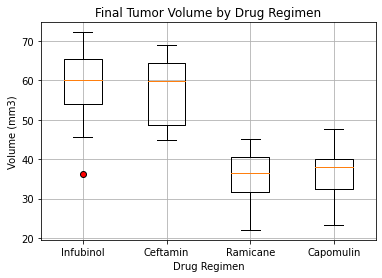

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest 

plot_data = [tumor_vol_Infubinol, tumor_vol_Ceftamin, tumor_vol_Ramicane, tumor_vol_Capomulin]

#Create and format box plot
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume by Drug Regimen")
ax1.set_ylabel("Volume (mm3)")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(plot_data, labels = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"], flierprops = (dict(marker='o', markerfacecolor='r')))

#Display box plot
plt.grid()
plt.show()


## Line and Scatter Plots

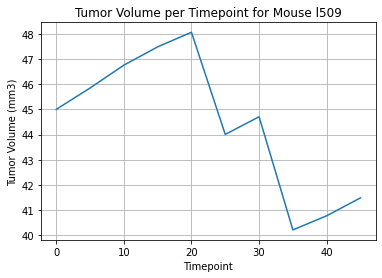

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin 

#Find all mice treated with Capomulin
Capomulin_mouse = combined_data_clean.loc[combined_data_clean["Drug Regimen"] == "Capomulin", :]

#Pull random sample mouse from Capomulin data each time
s_mouse = Capomulin_mouse.sample()
s_mouse_ID = s_mouse.iloc[0, 0] 

#Get all study data on sample mouse
s_mouse_data = Capomulin_mouse.loc[Capomulin_mouse["Mouse ID"] == s_mouse_ID]

#Create line plot
line = s_mouse_data.plot(kind = "line", x = "Timepoint", y = "Tumor Volume (mm3)", legend = False)
plt.title(f"Tumor Volume per Timepoint for Mouse {s_mouse_ID}")
plt.ylabel("Tumor Volume (mm3)")

#Display line plot
plt.grid()
plt.show()

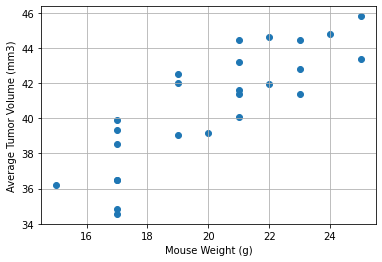

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_mouse_group = Capomulin_mouse.groupby(["Mouse ID"])[["Tumor Volume (mm3)", "Weight (g)"]].mean()
Capomulin_mouse_avg = Capomulin_mouse_group.rename(columns = {"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

#Make and display scatter plot
x_values = Capomulin_mouse_avg["Weight (g)"]
y_values = Capomulin_mouse_avg["Average Tumor Volume (mm3)"]
plt.scatter(x_values,y_values)
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.grid()
plt.show()

## Correlation and Regression

The r squared value is: 0.7088568047708717


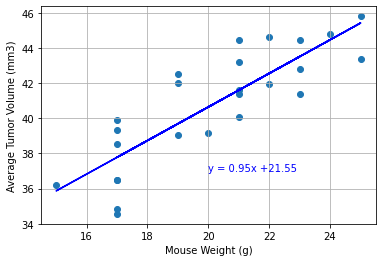

The correlation coefficient between weight and average tumor volume in mice on Capomulin is: 0.84


In [24]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen - using above x- and y-values

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

#Get line equation
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"b")

# Label plot and annotate the line equation
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(line_eq, (20,37),fontsize=10,color="b")

#Print r squared value
print(f"The r squared value is: {rvalue**2}")

#Show plot
plt.grid()
plt.show()

#Calculate and display correlation coefficient
print(f"""The correlation coefficient between weight and average tumor volume in mice on Capomulin is: {round(st.pearsonr(Capomulin_mouse_avg["Weight (g)"],Capomulin_mouse_avg["Average Tumor Volume (mm3)"])[0],2)}""")
